In [119]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [120]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/root/userspace/Workspace/competition2/input/"

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [121]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は1280、変数は12種類です。
テストデータのデータ数は319、変数は11種類です


In [122]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6
5,8.0,0.82,0.29,4.3,0.082,20.8,65.7,0.9934,3.15,0.53,9.4,5.3
6,7.8,0.88,0.26,3.8,0.106,31.1,66.4,1.0110,3.29,0.47,9.2,5.2
7,7.7,0.71,0.01,2.1,0.064,31.0,42.8,0.9831,3.40,0.57,11.9,5.8
8,7.5,0.44,0.31,2.1,0.069,12.9,72.5,0.9825,3.26,0.54,10.0,5.5
9,7.6,0.78,0.19,5.1,0.094,19.2,98.2,0.9985,3.18,0.52,9.6,6.0


## データ

訓練データセットに含まれるカラムを以下に示します。(テストデータセットにはqualityカラムは含まれません。)

カラム名|説明
---|---
fixed acidity | 酒石酸濃度
volatile acidity | 酢酸濃度
citric acid | クエン酸濃度
residual sugar | 発酵後に残っている砂糖の量
chlorides | ワインに含まれる塩分量
free sulfur dioxide | 遊離二酸化硫黄の量
total sulfur dioxide | (すべての)二酸化硫黄の量
density | ワインの密度
pH | ワインのpH
sulphates | ワインに含まれる硫酸塩の量
alcohol | アルコールの度数
quality | ワインの評価

In [123]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [124]:
df.isnull().sum() 

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 122
pH                      137
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [125]:
df_test.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 25
pH                      24
sulphates                0
alcohol                  0
dtype: int64

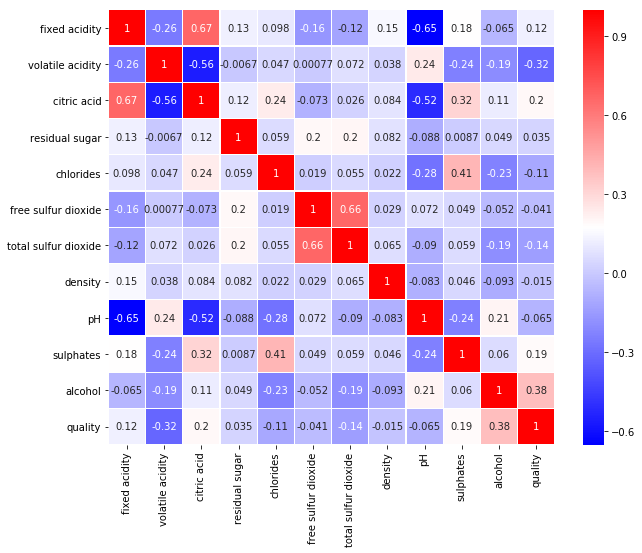

In [126]:
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [127]:
density = pd.concat([df['density'], df_test['density']])
pH = pd.concat([df['pH'], df_test['pH']])

df['density'].fillna(density.mean(), inplace=True)
df_test['density'].fillna(density.mean(), inplace=True)

df['pH'].fillna(pH.mean(), inplace=True)
df_test['pH'].fillna(pH.mean(), inplace=True)

df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [128]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.00000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.34125,0.527187,0.271383,2.549766,0.087614,15.599844,45.652813,0.996999,3.309692,0.658953,10.427812,5.614297
std,1.74115,0.181153,0.194353,1.452651,0.049233,10.482150,32.914044,0.009760,0.149536,0.175200,1.065322,0.987628
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.951600,2.720000,0.330000,8.400000,2.500000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,21.675000,0.991000,3.220000,0.550000,9.500000,4.900000
50%,8.00000,0.520000,0.260000,2.200000,0.079000,13.100000,36.800000,0.996805,3.312086,0.620000,10.200000,5.500000
75%,9.30000,0.640000,0.430000,2.600000,0.090250,20.925000,60.350000,1.002600,3.390000,0.730000,11.100000,6.300000
max,15.90000,1.610000,1.000000,15.500000,0.615000,71.800000,290.300000,1.029000,3.970000,2.050000,15.000000,9.700000


In [129]:
#正規化
df0 = df.iloc[:,:-1]   # 毎回スライスするのはくどいので別の変数に代入しておきます。
df_seiki = (df0 - df0.mean()) / (df0.max() - df0.min())
df_seiki['quality'] = df['quality']

df0 = df_test  # 毎回スライスするのはくどいので別の変数に代入しておきます。
df_test_seiki = (df0 - df0.mean()) / (df0.max() - df0.min())

In [130]:
df_seiki

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.130246,0.069002,-0.031383,-0.010258,-0.015944,-0.134179,-0.045912,0.034901,-0.183754,-0.051717,-0.155729,5.1
1,-0.200112,-0.125629,-0.021383,-0.051354,-0.005993,-0.163840,-0.062092,-0.037450,0.040246,-0.127298,-0.034517,4.8
2,-0.110826,-0.065227,-0.101383,-0.051354,-0.007652,0.163844,0.019863,-0.037450,0.160246,-0.016833,-0.004214,5.5
3,0.023103,-0.038381,-0.001383,-0.044504,-0.049111,0.026838,-0.028325,-0.081378,-0.119754,0.111074,0.101847,6.1
4,-0.128683,-0.078649,0.028617,0.434948,-0.005993,0.145482,-0.000889,-0.140810,0.032246,-0.011019,-0.034517,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-0.066183,0.008599,-0.061383,-0.023957,-0.027552,-0.120054,-0.061740,0.094333,-0.015754,-0.069159,-0.079972,4.6
1276,-0.110826,0.082424,-0.271383,0.092482,-0.002677,0.019776,-0.003351,0.124048,0.072246,-0.069159,-0.110275,4.4
1277,0.094531,-0.125629,0.098617,-0.023957,-0.022577,-0.148303,-0.115205,-0.043910,-0.063754,-0.022647,-0.170881,5.2
1278,0.112388,0.136116,-0.171383,-0.030806,-0.012627,-0.135591,-0.052947,0.060741,-0.071754,-0.057531,-0.049669,5.1


In [131]:
df_test_seiki

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.011919,-0.138831,0.278997,-0.014396,0.034425,0.605332,0.576425,0.013578,0.057887,0.337144,-0.134390
1,-0.126502,-0.029920,0.278997,0.239450,-0.071116,0.174502,0.489971,-0.120885,-0.018384,0.111654,0.050795
2,-0.011919,-0.029920,0.152415,0.000989,-0.013069,-0.098226,-0.025345,0.153112,0.049413,-0.045209,0.013758
3,-0.189002,-0.148732,0.076465,0.062527,-0.108055,-0.098226,0.019583,-0.223852,0.049413,-0.025601,0.347092
4,0.071415,-0.218039,0.241022,-0.083627,-0.073755,-0.119965,-0.170342,-0.051077,0.040938,0.131262,-0.041797
...,...,...,...,...,...,...,...,...,...,...,...
314,0.081831,-0.237841,0.101782,-0.045165,-0.055285,0.156715,0.053620,-0.122630,-0.137028,0.719497,-0.023279
315,0.040165,0.138397,0.430896,-0.037473,0.066087,-0.080439,0.317745,0.416637,-0.137028,-0.113836,-0.245501
316,-0.022335,-0.000217,-0.303282,-0.060550,-0.042092,-0.137751,-0.102268,0.036183,0.023989,-0.094228,-0.060316
317,-0.126502,0.049288,-0.189358,-0.045165,0.010678,0.334581,0.521285,0.015241,0.142633,-0.172660,-0.004760


In [132]:
import xgboost as xgb
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, mean_squared_error
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
X = df_seiki.iloc[:, 2:].values
y = df_seiki.iloc[:, 1].values

X_test = df_test_seiki.values

In [134]:
X_test

array([[-1.19187565e-02, -1.38831124e-01,  2.78996865e-01, ...,
         5.78872814e-02,  3.37144262e-01, -1.34389876e-01],
       [-1.26502090e-01, -2.99202334e-02,  2.78996865e-01, ...,
        -1.83839051e-02,  1.11654066e-01,  5.07953094e-02],
       [-1.19187565e-02, -2.99202334e-02,  1.52414587e-01, ...,
         4.94127051e-02, -4.52086791e-02,  1.37582724e-02],
       ...,
       [-2.23354232e-02, -2.17263106e-04, -3.03281616e-01, ...,
         2.39889763e-02, -9.42282869e-02, -6.03158017e-02],
       [-1.26502090e-01,  4.92876874e-02, -1.89357565e-01, ...,
         1.42633044e-01, -1.72659659e-01, -4.76024614e-03],
       [-3.27520899e-02,  2.67109470e-01, -2.48006032e-02, ...,
        -8.14133652e-03, -2.31483189e-01, -2.26982468e-01]])

In [135]:
train_df, test_df = model_selection.train_test_split(df_seiki, test_size=0.3)
train_df_y = train_df[['quality']]
train_df_x = train_df.copy().drop('quality', axis=1)
test_df_y = test_df[['quality']]
test_df_x = test_df.copy().drop('quality', axis=1)

In [136]:
clf = xgb.XGBRegressor()

# ハイパーパラメータ探索
clf_cv = model_selection.GridSearchCV(clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf_cv.fit(train_df_x, [i[0] for i in train_df_y.values])
print(clf_cv.best_params_, clf_cv.best_score_)

# 改めて最適パラメータで学習
clf = xgb.XGBRegressor(**clf_cv.best_params_)
clf.fit(train_df_x, [i[0] for i in train_df_y.values])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:42] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.5s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [137]:
mean_pred = [train_df_y.mean() for i in range(len(test_df_y))]
rmse_base = np.sqrt(mean_squared_error(test_df_y, mean_pred))
print("学習データの平均を予測としたやつをBaseLineとする\nBaseLineのrmse: " + str(rmse_base))

pred = clf.predict(test_df_x)
rmse = np.sqrt(mean_squared_error(test_df_y, pred))
print("予測したやつのrmse: " + str(rmse))

学習データの平均を予測としたやつをBaseLineとする
BaseLineのrmse: 0.9665070980341166
予測したやつのrmse: 0.8359138249480667


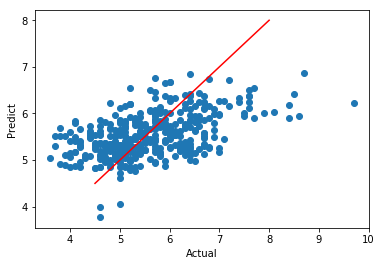

In [138]:
plt.ylabel("Predict")
plt.xlabel("Actual")
plt.scatter(test_df_y, pred)
plt.plot([4.5, 8], [4.5, 8], c='r')
plt.show()

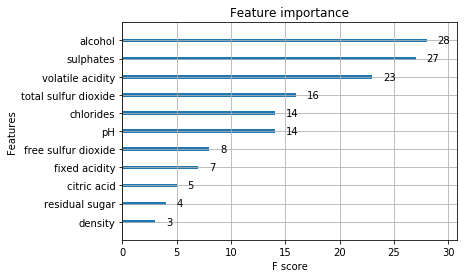

In [139]:
xgb.plot_importance(clf)
plt.show()

In [140]:
df_seiki.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.130246,0.069002,-0.031383,-0.010258,-0.015944,-0.134179,-0.045912,0.034901,-0.183754,-0.051717,-0.155729,5.1
1,-0.200112,-0.125629,-0.021383,-0.051354,-0.005993,-0.163840,-0.062092,-0.037450,0.040246,-0.127298,-0.034517,4.8
2,-0.110826,-0.065227,-0.101383,-0.051354,-0.007652,0.163844,0.019863,-0.037450,0.160246,-0.016833,-0.004214,5.5
3,0.023103,-0.038381,-0.001383,-0.044504,-0.049111,0.026838,-0.028325,-0.081378,-0.119754,0.111074,0.101847,6.1
4,-0.128683,-0.078649,0.028617,0.434948,-0.005993,0.145482,-0.000889,-0.140810,0.032246,-0.011019,-0.034517,5.6


In [144]:
df_seiki_best5 = df_seiki.loc[:,['volatile acidity','residual sugar','chlorides','sulphates','alcohol','quality']]
df_seiki_test_best5 = df_test_seiki.loc[:,['volatile acidity','residual sugar','chlorides','sulphates','alcohol']]

In [145]:
#寄与率ベスト５以上
train_df, test_df = model_selection.train_test_split(df_seiki_best5, test_size=0.3)
train_df_y = train_df[['quality']]
train_df_x = train_df.copy().drop('quality', axis=1)
test_df_y = test_df[['quality']]
test_df_x = test_df.copy().drop('quality', axis=1)

In [150]:
type(df_seiki_test_best5)

pandas.core.frame.DataFrame

In [146]:
clf = xgb.XGBRegressor()

# ハイパーパラメータ探索
clf_cv = model_selection.GridSearchCV(clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf_cv.fit(train_df_x, [i[0] for i in train_df_y.values])
print(clf_cv.best_params_, clf_cv.best_score_)

# 改めて最適パラメータで学習
clf = xgb.XGBRegressor(**clf_cv.best_params_)
clf.fit(train_df_x, [i[0] for i in train_df_y.values])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:18] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.6s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [147]:
mean_pred = [train_df_y.mean() for i in range(len(test_df_y))]
rmse_base = np.sqrt(mean_squared_error(test_df_y, mean_pred))
print("学習データの平均を予測としたやつをBaseLineとする\nBaseLineのrmse: " + str(rmse_base))

pred = clf.predict(test_df_x)
rmse = np.sqrt(mean_squared_error(test_df_y, pred))
print("予測したやつのrmse: " + str(rmse))

学習データの平均を予測としたやつをBaseLineとする
BaseLineのrmse: 0.9736012223472115
予測したやつのrmse: 0.8623897656261521


In [151]:
pred = clf.predict(df_seiki_test_best5)

In [152]:
pred

array([5.5464954, 5.912668 , 5.477228 , 6.1706247, 5.8738265, 5.5317874,
       5.3470216, 5.5098143, 6.268312 , 5.3644586, 6.97651  , 5.056452 ,
       6.366761 , 6.550895 , 5.881894 , 5.036518 , 5.0396657, 5.8651466,
       5.323284 , 6.773057 , 5.693136 , 5.036518 , 4.765645 , 5.1355095,
       5.429676 , 6.072686 , 4.881274 , 5.171485 , 4.969633 , 6.3472733,
       6.444875 , 5.4137454, 5.4024963, 5.886608 , 5.4143267, 5.2557416,
       4.284558 , 6.0108004, 4.969633 , 4.9817667, 5.264809 , 6.668261 ,
       5.3945136, 5.212434 , 5.8686657, 5.9256444, 5.3470216, 5.725968 ,
       5.036518 , 6.579985 , 5.301342 , 6.6600423, 5.00574  , 5.294885 ,
       4.5431104, 4.969633 , 6.264098 , 5.8439612, 5.6140404, 5.6547976,
       6.97651  , 5.153763 , 5.7839494, 5.1322956, 5.0181985, 6.381224 ,
       5.1322956, 5.043421 , 5.0860157, 5.2305284, 5.2821684, 6.23367  ,
       5.5047708, 5.3414674, 5.9049306, 6.97651  , 6.6664467, 5.1229744,
       5.6547976, 5.107824 , 6.661687 , 5.3396635, 

In [153]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/root/userspace/Workspace/competition2/"

submission = pd.read_csv(path + 'submission.csv')
submission

,quality
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
314,5.0
315,5.0
316,5.0
317,5.0


In [154]:
submission['quality'] = pred
submission

,quality
0,5.546495
1,5.912668
2,5.477228
3,6.170625
4,5.873827
...,...
314,5.925644
315,4.933693
316,5.119514
317,5.122974


In [155]:
submission.to_csv('/root/userspace/Workspace/competition2/submission.csv', index=False)